## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in this jupyter notebook. Some of the early preprocessing steps have been done for you already.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. 



# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

In [2]:
## Your answer

# 2. Preprocessing

In [3]:
# Importing all the modules you will need, and then some. This may take some time.
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.dummy import DummyClassifier
# from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import mean
print ("done")

%matplotlib inline

done


In [4]:
pd.set_option('display.max_rows', None)

In our class we covered multiple classification methods. In this part of the home work you can compare them 

* Find an interesting dataset.
* You may use the "auto_imports.csv" dataset discussed in class.
* You may also use the "pubg_dataset- Sheet.csv" discussed in class.
* You may also use a dataset that you find elsewhere.
* Bonus points: Find a dataset that is relevant to your answer in question 1.

In [5]:
#Read in data - auto_imports provided as model.
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2.1 Perform some basic EDA on your data.

In [6]:
df.shape

(201, 18)

In [7]:
df.isnull().sum()

fuel_type      0
body           0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_type    0
cylinders      0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [8]:
# Perform some basic EDA on your data. (more than just the info() shown here.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

## 2.2 Wrangle the data into shape.

In [9]:
# df["bore"] = df["bore"].astype(float) ## Throw error
# df["stroke"] = df["stroke"].astype(float) ## Throw error
# df["horse_power"] = df["horse_power"].astype(float) ## Throw error
# df["peak_rpm"] = df["peak_rpm"].astype(float) ## Throw error

**bore** contains floating values but its type are considered as object. So, I tried to typecast the "bore" field's type into float but I came across error "ValueError: could not convert string to float: '?'" then I tried to look the records which contains "?" in **bore** field.

In [10]:
df[(df["bore"] == "?") | (df["stroke"] == "?") | (df["horse_power"] == "?") | (df["peak_rpm"] == "?")]

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
52,gas,hatchback,95.3,169.0,65.7,49.6,2380,rotor,two,70,?,?,9.4,101,6000,17,23,10945
53,gas,hatchback,95.3,169.0,65.7,49.6,2380,rotor,two,70,?,?,9.4,101,6000,17,23,11845
54,gas,hatchback,95.3,169.0,65.7,49.6,2385,rotor,two,70,?,?,9.4,101,6000,17,23,13645
55,gas,hatchback,95.3,169.0,65.7,49.6,2500,rotor,two,80,?,?,9.4,135,6000,16,23,15645
126,gas,wagon,96.1,181.5,66.5,55.2,2579,ohc,four,132,3.46,3.9,8.7,?,?,23,31,9295
127,gas,hatchback,96.1,176.8,66.6,50.5,2460,ohc,four,132,3.46,3.9,8.7,?,?,23,31,9895


Four rows contains ? in bore field. Following are the indexes: 52, 53, 54, 55 -> Type object\
Similar for stroke -> indexes: 52, 53, 54, 55

HorsePower and RPM also contain floating point values but is considered as object. 

horse_power and peak_rpm indexes containing ?:  126, 127



In [11]:
#  In the auto_imports, for instance, change data representation and types as needed, and drop unnecessary columns.

###replace question marks with "None" values.
df = df.replace({'?': None})

### Change the variables: bore, stroke, horse_power, peak_rpm to float64
df[['bore', 'stroke', 'horse_power', 'peak_rpm']] = df[['bore', 'stroke', 'horse_power', 'peak_rpm']].apply(pd.to_numeric, axis = 1)

## Drop body,engine_type, and cylinders
df2=df.drop(['body','engine_type','cylinders'], axis=1)

In [12]:
# Confirm data is cleaned up.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   wheel_base   201 non-null    float64
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   heights      201 non-null    float64
 5   curb_weight  201 non-null    int64  
 6   engine_size  201 non-null    int64  
 7   bore         197 non-null    float64
 8   stroke       197 non-null    float64
 9   comprassion  201 non-null    float64
 10  horse_power  199 non-null    float64
 11  peak_rpm     199 non-null    float64
 12  city_mpg     201 non-null    int64  
 13  highway_mpg  201 non-null    int64  
 14  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 23.7+ KB


In [13]:
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Now we come to know 4 data contains null (empty values) for bore and stroke and 2 null for horse_power and peak_rpm.

What can we do to those null field?
- We can drop those records.
- Replace with mean/median values in these records based on column

In [14]:
## Fill Null values with mean from respective fields
df2["bore"] = df2["bore"].fillna(df2["bore"].mean())
df2["stroke"] = df2["stroke"].fillna(df2["stroke"].mean())
df2["horse_power"] = df2["horse_power"].fillna(df2["horse_power"].mean())
df2["peak_rpm"] = df2["peak_rpm"].fillna(df2["peak_rpm"].mean())


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   wheel_base   201 non-null    float64
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   heights      201 non-null    float64
 5   curb_weight  201 non-null    int64  
 6   engine_size  201 non-null    int64  
 7   bore         201 non-null    float64
 8   stroke       201 non-null    float64
 9   comprassion  201 non-null    float64
 10  horse_power  201 non-null    float64
 11  peak_rpm     201 non-null    float64
 12  city_mpg     201 non-null    int64  
 13  highway_mpg  201 non-null    int64  
 14  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 23.7+ KB


## 2.3 Perform additional data wrangling to prepare the data for classicifation. For instance, in the auto_imports
* Change ['gas', 'diesel'] string values to [0, 1] integer values.
* Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables
* Split your data into training and testing set. Use test_size=0.3, random_state=746 

In [16]:
print(df2["fuel_type"].unique())

['gas' 'diesel']


In [17]:
# Change ['gas', 'diesel'] string values to [0, 1] integer values.
df2['fuel_type'] = df2['fuel_type'].replace({'gas': 0, 'diesel': 1}).astype(int)

# Splitted Independent variables and dependent variables for classification task
X = df2.drop(columns= ["fuel_type"])
y = df2["fuel_type"]

# Splitted X and y into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 746)

/tmp/ipykernel_173144/2219668303.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['fuel_type'] = df2['fuel_type'].replace({'gas': 0, 'diesel': 1}).astype(int)


# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [25]:
#your code
logistic_model = LogisticRegression(max_iter= 1000, random_state=42)
logistic_model.fit(X = X_train, y= y_train)

LogisticRegression(max_iter=1000, random_state=42)

Confusion matrix: 
[[55  0]
 [ 0  6]] 



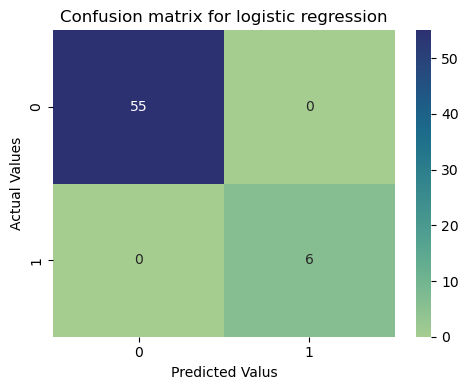

In [41]:
y_predicted_lr = logistic_model.predict(X_test)

lr_confusion_matrix = confusion_matrix(y_true= y_test, y_pred= y_predicted_lr)
print(f"Confusion matrix: \n{lr_confusion_matrix} \n")

#Conffusion matrix plot
plt.figure(figsize=(5,4))
sns.heatmap(lr_confusion_matrix, annot= True, cmap= "crest")
plt.xlabel("Predicted Valus")
plt.ylabel("Actual Values")
plt.title("Confusion matrix for logistic regression")
plt.tight_layout()
plt.show()

In [42]:
#Classification Report
lr_classification_report = classification_report(y_true= y_test, y_pred= y_predicted_lr)
print("\nClassification report for the logistic regression:\n")
print(lr_classification_report)


Classification report for the logistic regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00         6

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



1.0
AUC: 1.00


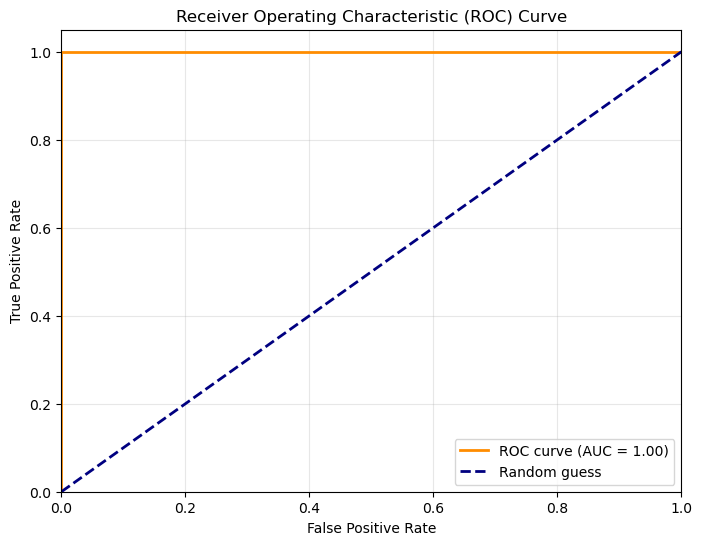

In [ ]:
# # Compute ROC curve and AUC score
# fpr, tpr, thresholds = roc_curve(y_test, y_predicted_lr)
# roc_auc = auc(fpr, tpr)
# print(roc_auc)

# # Print and plot
# print(f"AUC: {roc_auc:.2f}")
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random guess")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver Operating Characteristic (ROC) Curve")
# plt.legend(loc="lower right")
# plt.grid(alpha=0.3)
# plt.show()

### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [19]:
#your code

### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

In [20]:
#your code

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

In [21]:
#your code

### 3.5 Compare your results and comment on your findings. 
* Which one(s) did the best job?
* What could have been the problem with the ones that did not work?
* etc.

In [22]:
#your answer

## 4. Bonus points
* Is your dataset imbalanced, yes or no?
* If yes, is it badly enough imbalanced that it is wrth fixing?
* (this is the bonus part): Try to fix the imbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferably one that "failed" before) and see if you get better results.

In [23]:
#your code